Points: [[13, 46], [52, 41], [27, 90], [1, 66], [42, 37], [45, 59], [49, 34], [76, 47], [20, 31], [85, 47]]


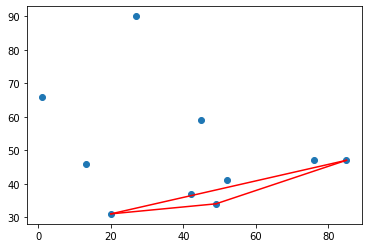

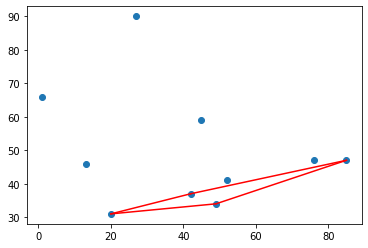

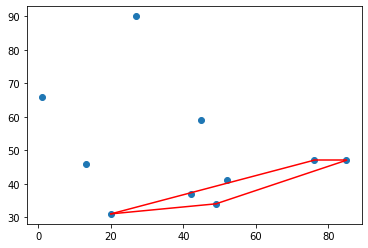

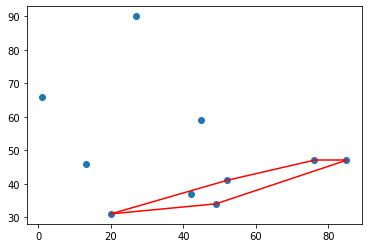

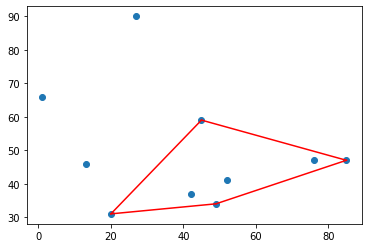

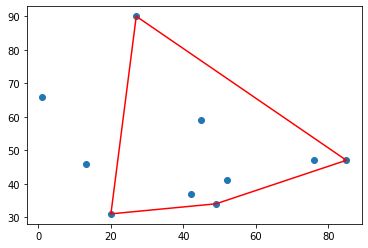

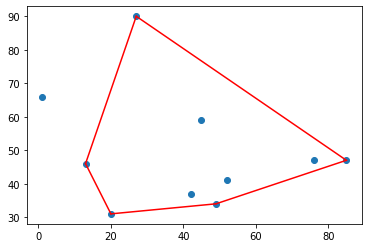

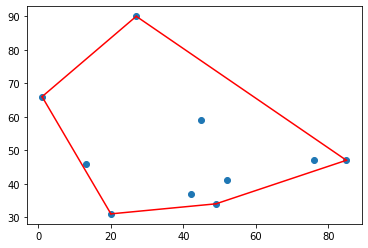

Hull: [[20, 31], [49, 34], [85, 47], [27, 90], [1, 66]]


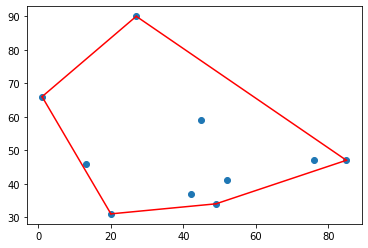

In [4]:
from matplotlib import pyplot as plt # for plotting
from random import randint # for sorting and creating data pts
from math import atan2 # for computing polar angle

# Returns a list of (x,y) coordinates of length 'num_points',
# each x and y coordinate is chosen randomly from the range 
# 'min' up to 'max'.
def create_points(ct,min=0,max=100):
    return [[randint(min,max),randint(min,max)] \
            for _ in range(ct)]

# Creates a scatter plot, input is a list of (x,y) coordinates.
# The second input 'convex_hull' is another list of (x,y) coordinates
# consisting of those points in 'coords' which make up the convex hull,
# if not None, the elements of this list will be used to draw the outer
# boundary (the convex hull surrounding the data points).
def scatter_plot(coords,convex_hull=None):
    xs,ys=zip(*coords) # unzip into x and y coord lists
    plt.scatter(xs,ys) # plot the data points

    if convex_hull!=None:
        # plot the convex hull boundary, extra iteration at
        # the end so that the bounding line wraps around
        for i in range(1,len(convex_hull)+1):
            if i==len(convex_hull): i=0 # wrap
            c0=convex_hull[i-1]
            c1=convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()


# Returns the polar angle (radians) from p0 to p1.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def polar_angle(p0,p1=None):
    if p1==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return atan2(y_span,x_span)


# Returns the euclidean distance from p0 to p1,
# square root is not applied for sake of speed.
# If p1 is None, defaults to replacing it with the
# global variable 'anchor', normally set in the 
# 'graham_scan' function.
def distance(p0,p1=None):
    if p1==None: p1=anchor
    y_span=p0[1]-p1[1]
    x_span=p0[0]-p1[0]
    return y_span**2 + x_span**2


# Returns the determinant of the 3x3 matrix...
# [p1(x) p1(y) 1]
#[p2(x) p2(y) 1]
# [p3(x) p3(y) 1]
# If >0 then counter-clockwise
# If <0 then clockwise
# If =0 then collinear
def det(p1,p2,p3):
    return   (p2[0]-p1[0])*(p3[1]-p1[1]) \
            -(p2[1]-p1[1])*(p3[0]-p1[0])


# Sorts in order of increasing polar angle from 'anchor' point.
# 'anchor' variable is assumed to be global, set from within 'graham_scan'.
# For any values with equal polar angles, a second sort is applied to
# ensure increasing distance from the 'anchor' point.
def quicksort(a):
    if len(a)<=1: return a
    smaller,equal,larger=[],[],[]
    piv_ang=polar_angle(a[randint(0,len(a)-1)]) # select random pivot
    for pt in a:
        pt_ang=polar_angle(pt) # calculate current point angle
        if   pt_ang<piv_ang:  smaller.append(pt)
        elif pt_ang==piv_ang: equal.append(pt)
        else:                 larger.append(pt)
    return   quicksort(smaller) \
            +sorted(equal,key=distance) \
            +quicksort(larger)


# Returns the vertices comprising the boundaries of
# convex hull containing all points in the input set. 
# The input 'points' is a list of (x,y) coordinates.
# If 'show_progress' is set to True, the progress in 
# constructing the hull will be plotted on each iteration.
def graham_scan(points,show_progress=False):
    global anchor # to be set, (x,y) with smallest y value

    # Find the (x,y) point with the lowest y value,
    # along with its index in the 'points' list. If
    # there are multiple points with the same y value,
    # choose the one with smallest x.
    min_idx=None
    for i,(x,y) in enumerate(points):
        if min_idx==None or y<points[min_idx][1]:
            min_idx=i
        if y==points[min_idx][1] and x<points[min_idx][0]:
            min_idx=i

    # set the global variable 'anchor', used by the
    # 'polar_angle' and 'distance' functions
    anchor=points[min_idx]

    # sort the points by polar angle then delete 
    # the anchor from the sorted list
    sorted_pts=quicksort(points)
    del sorted_pts[sorted_pts.index(anchor)]

    # anchor and point with smallest polar angle will always be on hull
    hull=[anchor,sorted_pts[0]]
    for s in sorted_pts[1:]:
        while det(hull[-2],hull[-1],s)<=0:
            del hull[-1] # backtrack
            #if len(hull)<2: break
        hull.append(s)
        if show_progress: scatter_plot(points,hull)
    return hull

# For each size in the 'sizes' list, compute the average
# time to find the Convex Hull for a dataset of that size,
# the range used for max and min for the create_points function
# is always 10 times the highest value in the 'sizes' list.
def benchmark(sizes=[10,100,1000,10000,100000]):
    for s in sizes:
        tot=0.0
        for _ in range(3):
            pts=create_points(s,0,max(sizes)*10)
            t0=time()
            hull=graham_scan(pts,False)
            tot+=(time()-t0)
        print ("size %d time: %0.5f"%(s,tot/3.0))


pts=create_points(10)
print ("Points:",pts)
hull=graham_scan(pts,True)
print ("Hull:",hull)
scatter_plot(pts,hull)